In [1]:
import ptychoSampling.farfield.analysis_scripts.analysis_utils as anut
import ptychoSampling.farfield.analysis_scripts.combined_analysis_utils as cbut
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import ptychoSampling.farfield.analysis_scripts.latex_output_utils as ltxut
import ptychoSampling.farfield.analysis_scripts.plot_params as params
from ptychoSampling.farfield.analysis_scripts.plot_utils import filterDatasetsForPlots, getData,  _plotObjAmpl, _plotObjPhase
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, NullFormatter
import os
import dill
import string

In [2]:
%load_ext autoreload
%autoreload 2

# 1e3 photons, gaussian

In [3]:
base_path = os.environ['HOME'] + '/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/'
g_key_fname_dict = {'LM-A': 'lma_linesearch_efficient_gaussian_data.pkl',
                    'NAG': 'awf_gaussian_data.pkl',
                    'NCG': 'cg_gaussian_data.pkl',
                    'LM-J': 'jlma_linesearch_efficient_gaussian_data.pkl',
                    'ADMM': 'admm_gaussian_data_edited.pkl',
                    'PHeBIE': 'phebie_learning_rates_gaussian_data.pkl',
                    'ePIE': 'epie_gaussian_data_edited.pkl'}
                  
g_key_fname_dict = {k: base_path + v for k, v in g_key_fname_dict.items()}
g_data_all = anut.combineDatasets(g_key_fname_dict)
g_data_all_new = filterDatasetsForPlots(g_data_all, params.admm_betas[1e3]['gaussian'])


LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_efficient_gaussian_data.pkl
NAG /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/awf_gaussian_data.pkl
NCG /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/cg_gaussian_data.pkl
LM-J /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_efficient_gaussian_data.pkl
ADMM /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/admm_gaussian_data_edited.pkl
PHeBIE /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/phebie_learning_rates_gaussian_data.pkl
ePIE /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/epie_gaussian_data_edited.pkl


In [4]:
n_cols = 3
col_width = 4
tot_col_width = n_cols * col_width
row_width = 3.5


## SPR data, gaussian

In [5]:
df_keys_ordered = ['training_batch_size', 'method']
[
    g_pa_datasets,
    g_pa_dfs,
    g_pa_means,
    g_pa_lows, 
    g_pa_highs
] = anut.collectDatasetsAndDataframes(g_data_all_new, False,
                                      df_keys_ordered)
    

(0, 'PLM-A')
(0, 'LM-A')
(0, 'NAG')
(0, 'PNCG')
(0, 'NCG')


In [19]:
!du -h spr_1e3_gaussian.png spr_1e3_gaussian.pdf

316K	spr_1e3_gaussian.png
2.1M	spr_1e3_gaussian.pdf


PLM-A
1.145674228668213
NAG
1.1438169479370117
PNCG
1.1440643072128296


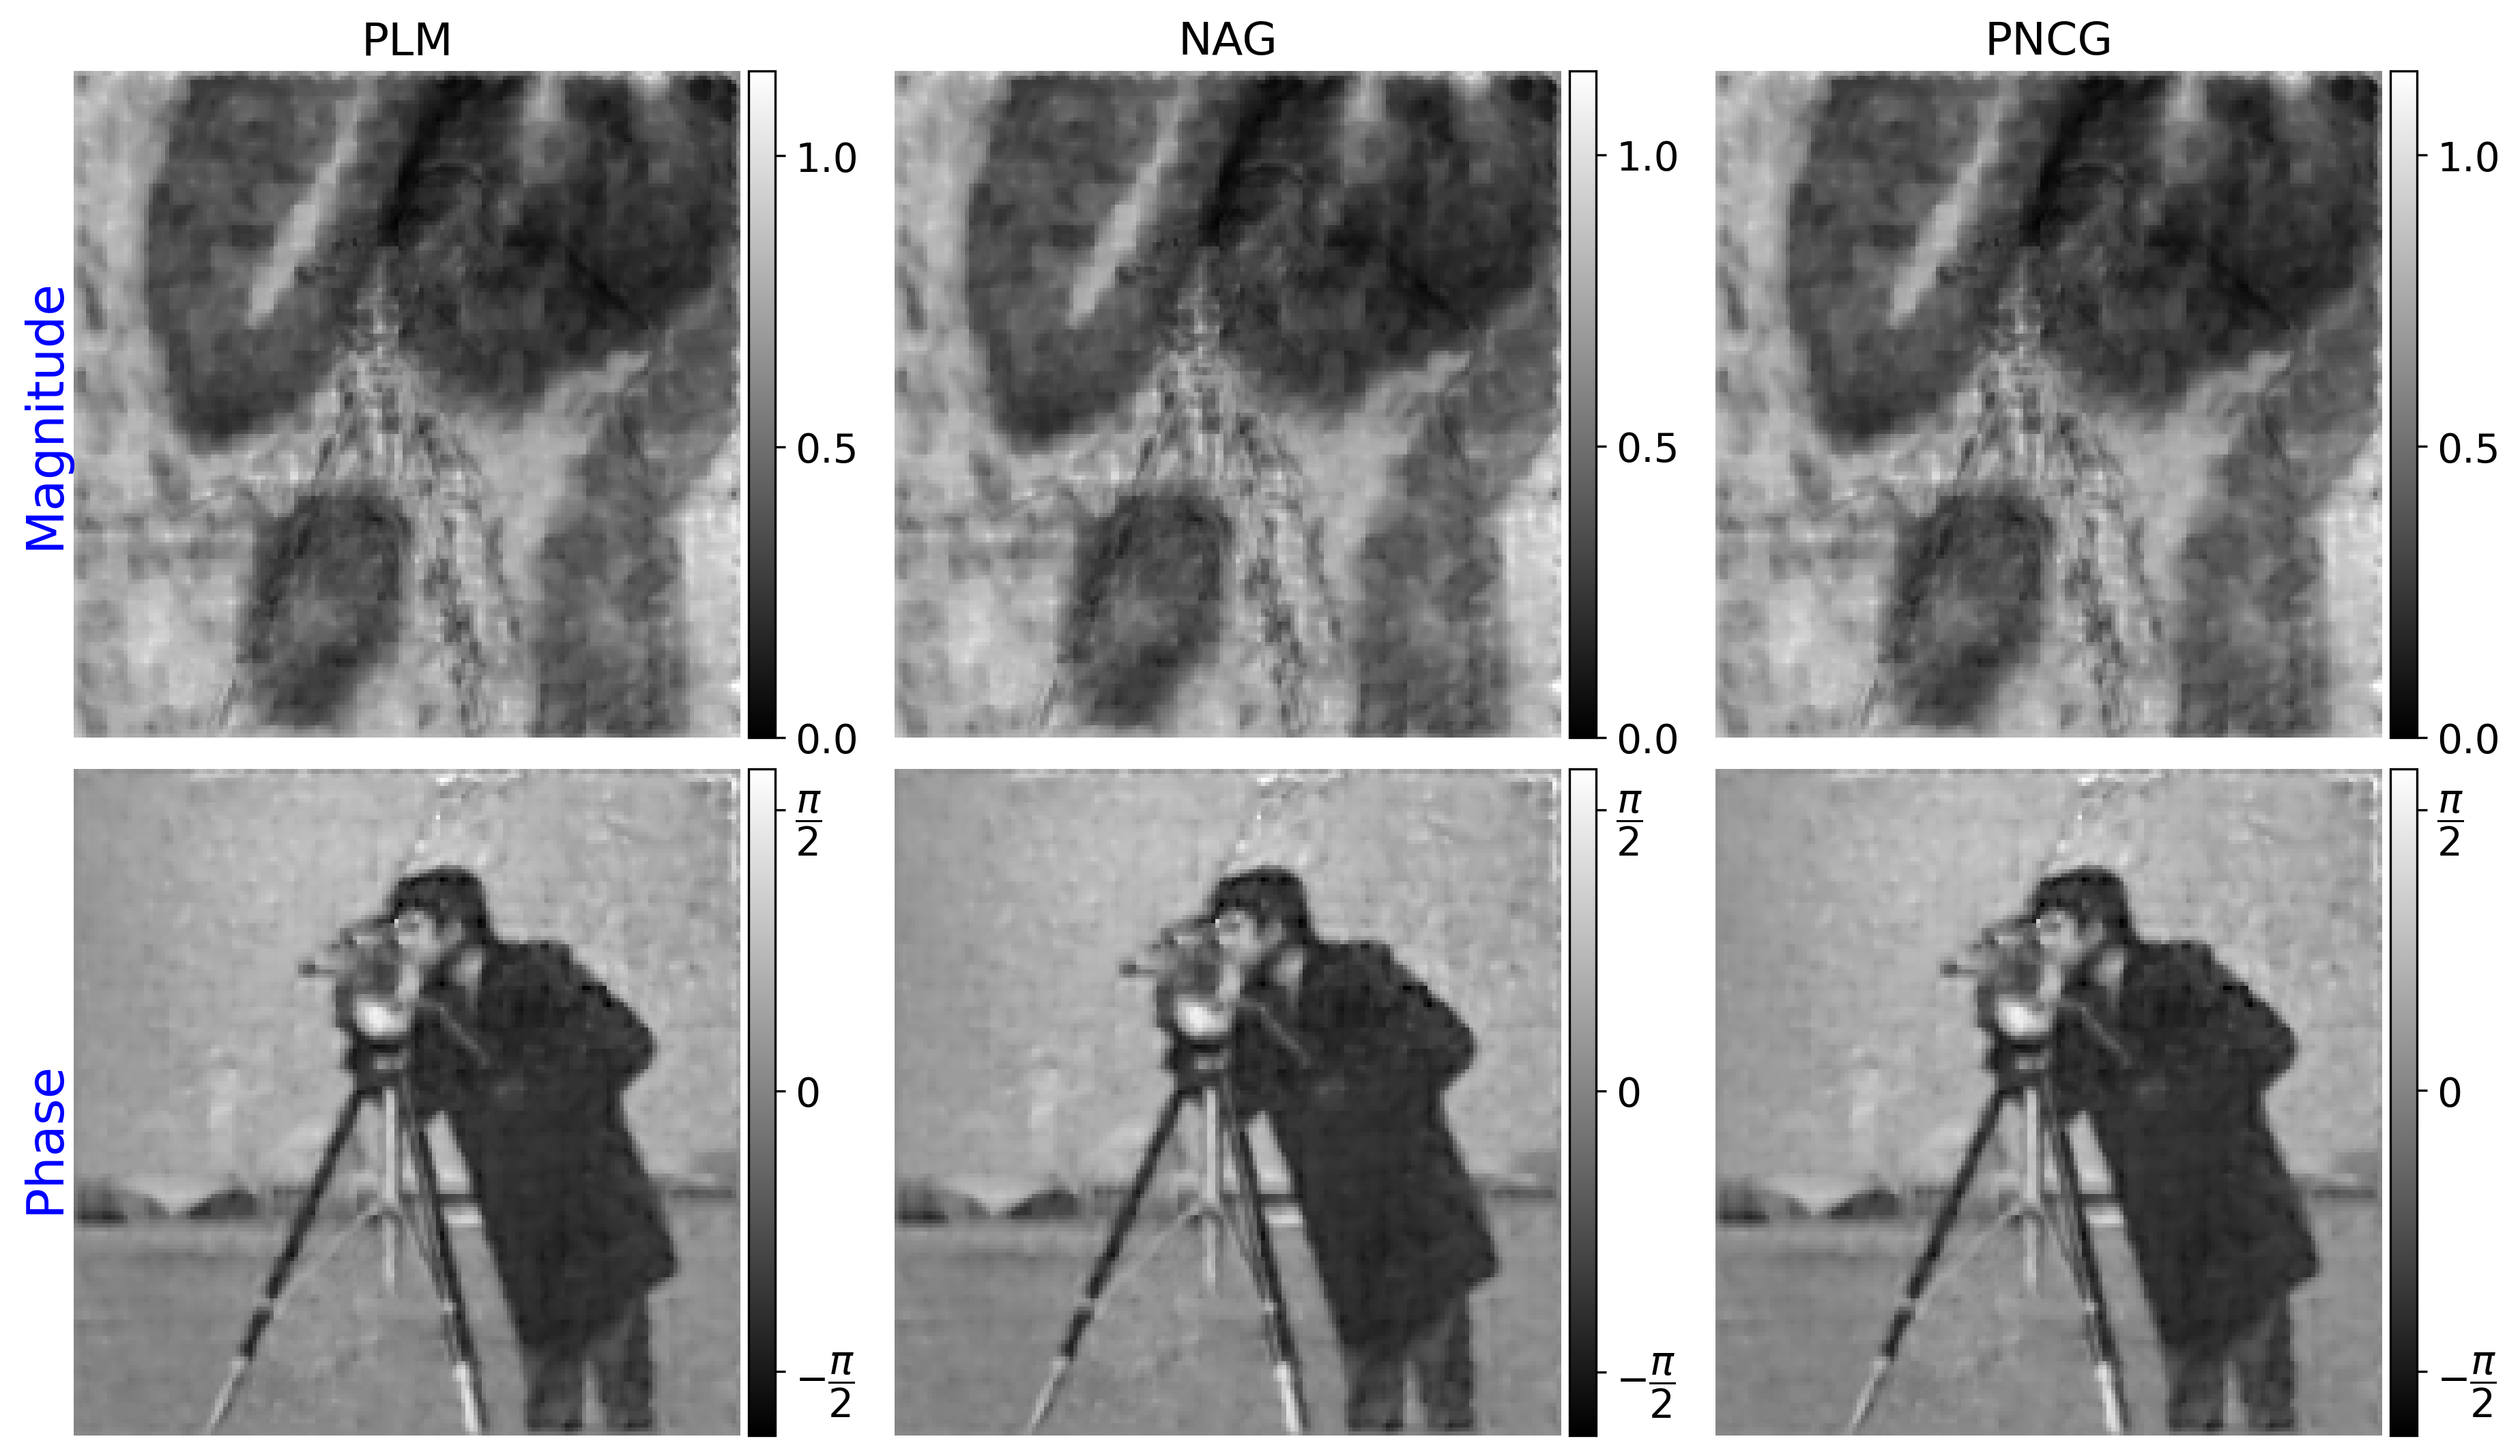

In [18]:
n_rows = 2
tot_row_width = row_width * n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=[tot_col_width,tot_row_width], constrained_layout=True, dpi=300)
col = 0
for ds in g_pa_datasets:
    method = ds.iterable_params['method']
    if method in ['LM-A', 'NCG']: continue
    print(method)
    title = method
    if method == 'PLM-A': 
        title = 'PLM'
    obj_mean = np.mean(ds.final_objs, axis=0)
    _plotObjAmpl(np.abs(obj_mean), axes[0, col])
    angles = np.angle(obj_mean)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[1, col])
    
    axes[0, col].set_title(title, fontsize=16)
    col += 1
    
axes[0,0].text(-0.08, 0.3, 'Magnitude', transform=axes[0, 0].transAxes, 
               size=18, rotation=90, color='blue')
axes[1,0].text(-0.08, 0.35, 'Phase', transform=axes[1, 0].transAxes, 
               size=18, rotation=90, color='blue')
#plt.savefig('spr_1e3_gaussian.pdf', bbox_inches='tight')
plt.savefig('spr_1e3_gaussian.png', bbox_inches='tight')

## BPR data, gaussian

In [20]:
df_keys_ordered = ['training_batch_size', 'method']
[
    g_pb_datasets,
    g_pb_dfs,
    g_pb_means,
    g_pb_lows, 
    g_pb_highs
] = anut.collectDatasetsAndDataframes(g_data_all_new, True,
                                      df_keys_ordered)
    

(0, 'PLM-A')
(0, 'LM-A')
(0, 'PLM-J')
(0, 'ADMM')
(0, 'PHeBIE')
(1, 'ePIE')


In [25]:
!du -h bpr_1e3_gaussian.*

3.4M	bpr_1e3_gaussian.pdf
648K	bpr_1e3_gaussian.png


PLM-A
1.0
0 1
PLM-J
1.0
0 2
ADMM
1.0000001192092896
1 0
PHeBIE
1.0000001192092896
1 1
ePIE
1.0
1 2


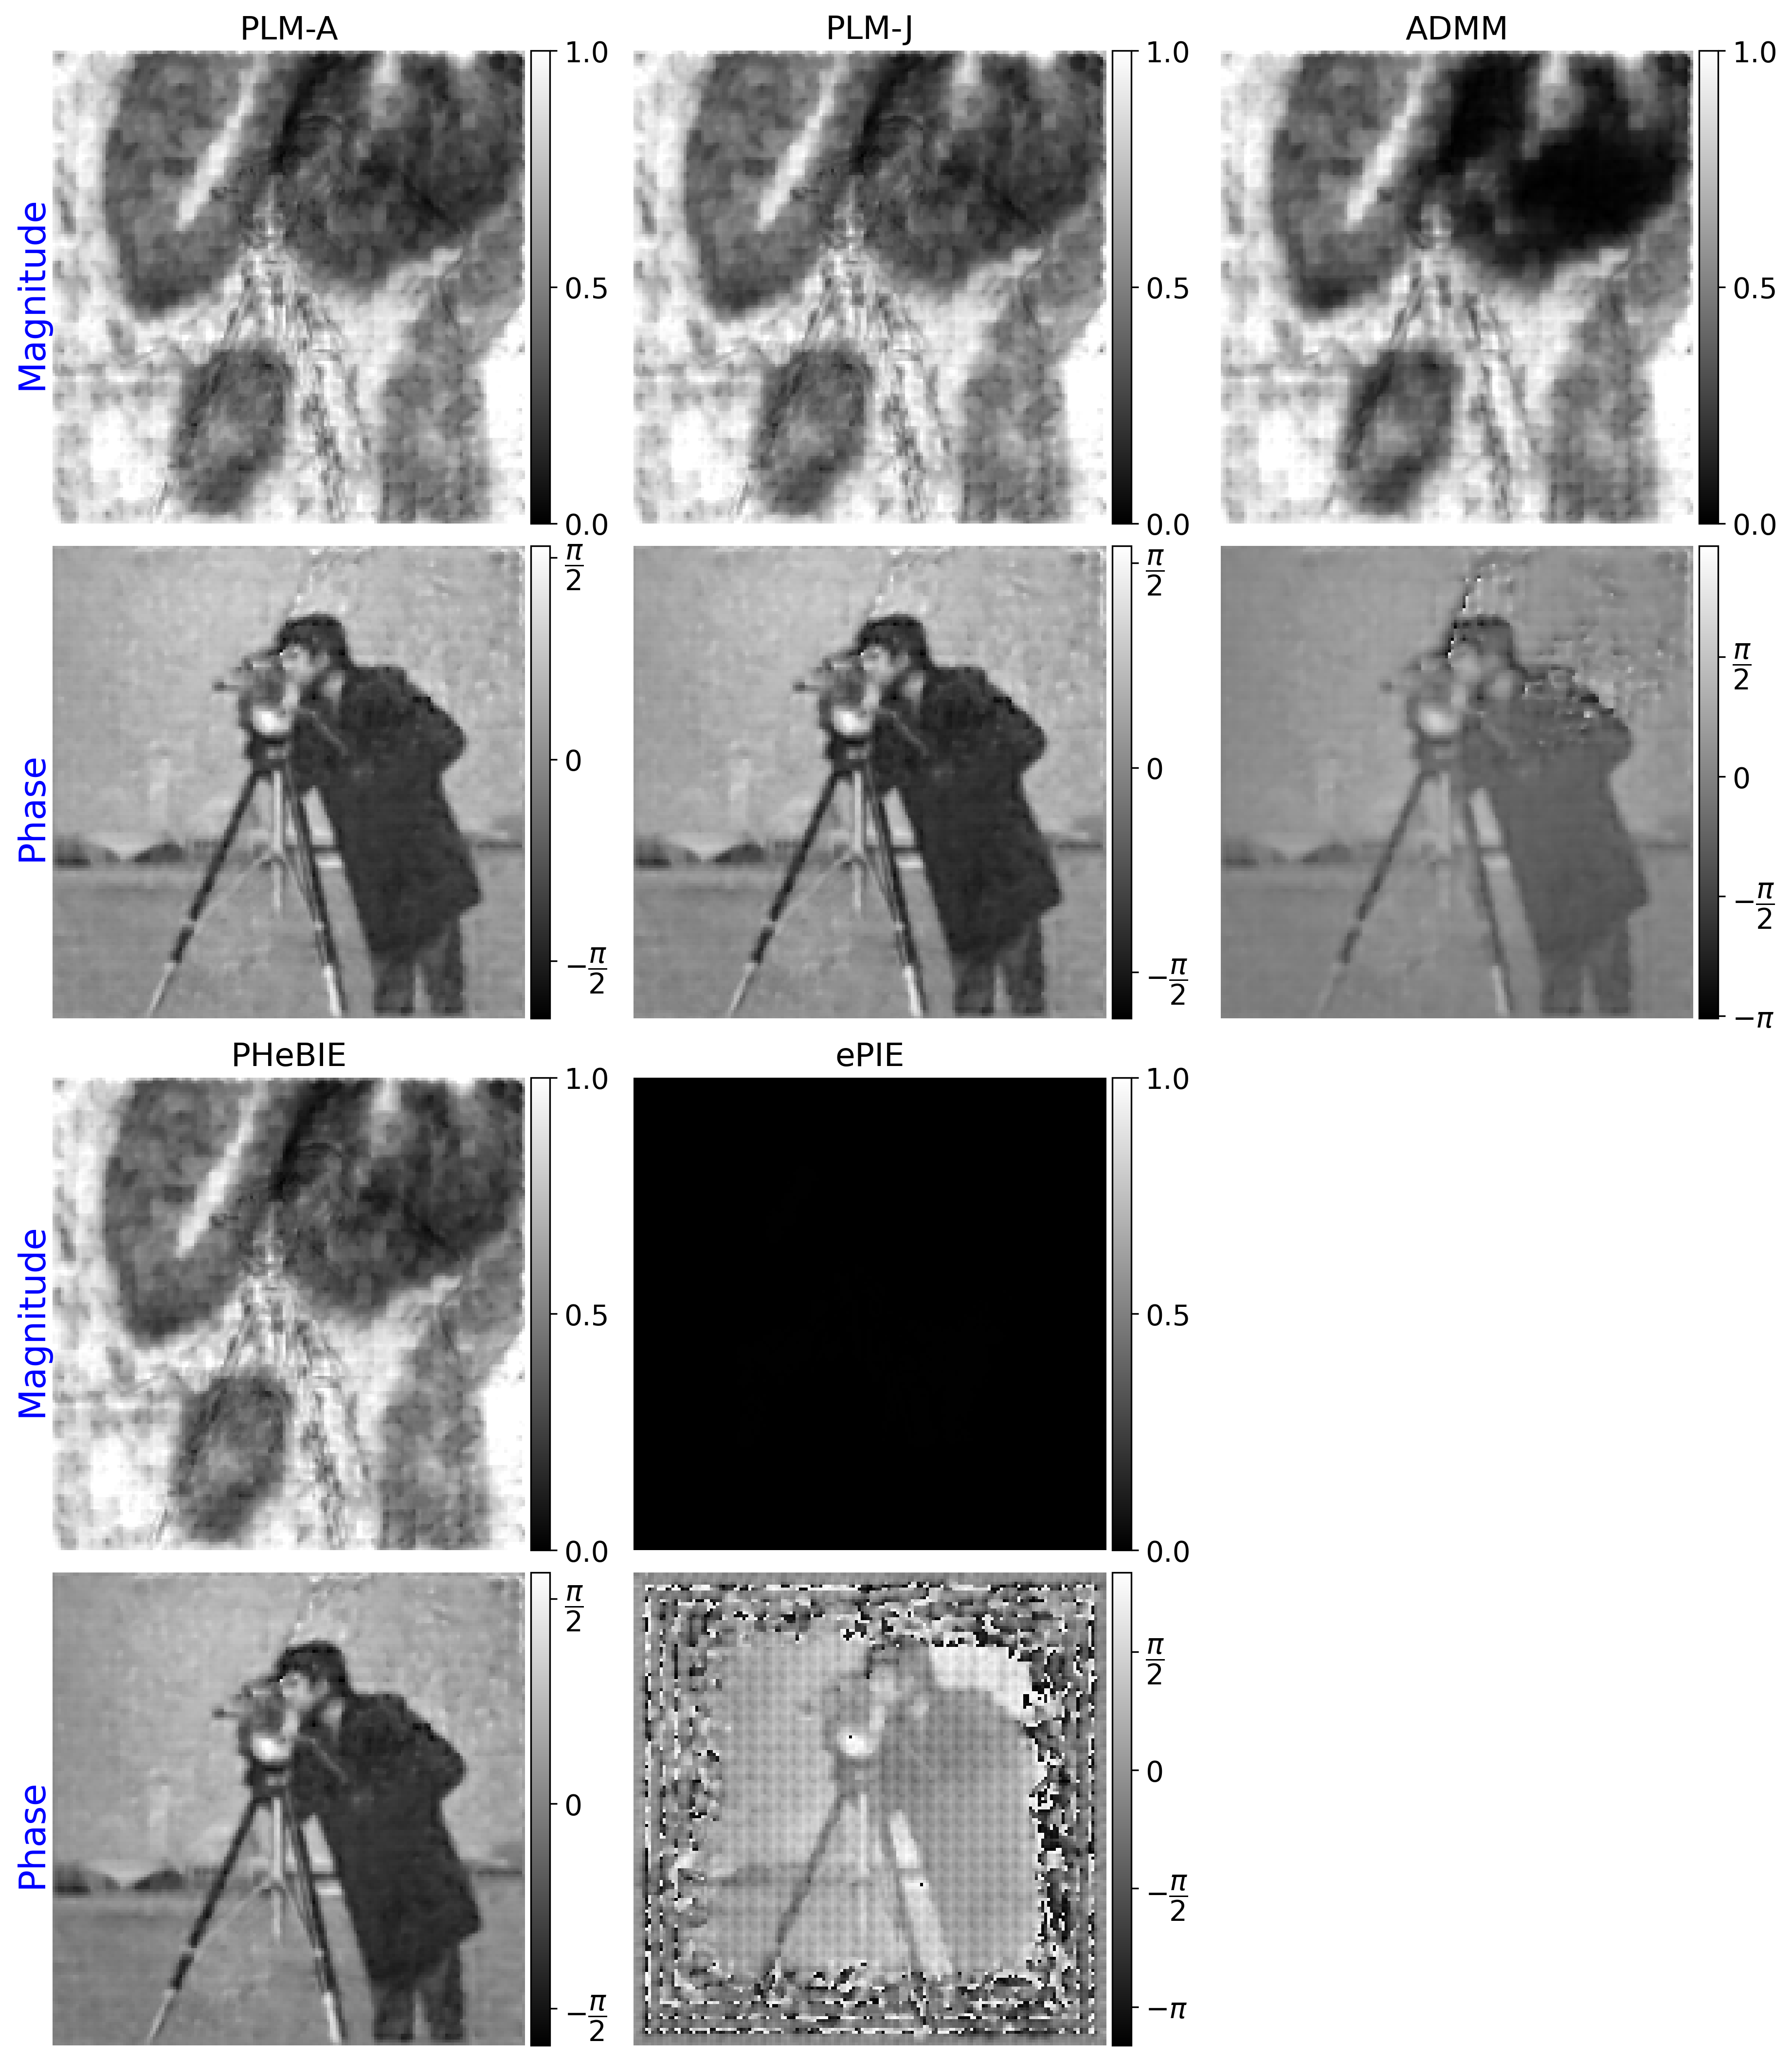

In [24]:
n_rows = 4
tot_row_width = row_width * n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=[tot_col_width,tot_row_width], constrained_layout=True, dpi=300)
col = 0
row = 0
count = 0
for ds in g_pb_datasets:
    method = ds.iterable_params['method']
    if method in ['LM-A', 'NCG', 'PNCG']: continue
    print(method)
    title = method
    if method == 'PLM-A': 
        title = 'PLM-A'
    obj_mean = np.mean(ds.final_objs, axis=0)
    _plotObjAmpl(np.abs(obj_mean), axes[row * 2, col])
    angles = np.angle(obj_mean)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[2 * row + 1, col])
    
    axes[2 * row, col].set_title(title, fontsize=16)
    axes[2 * row, col].set_axis_off()
    count = count + 1
    col = count % n_cols
    row = count // n_cols
    print(row, col)
    
    
axes[2,2].set_axis_off()
axes[3,2].set_axis_off()
axes[0,0].text(-0.08, 0.3, 'Magnitude', transform=axes[0, 0].transAxes, 
               size=18, rotation=90, color='blue')
axes[1,0].text(-0.08, 0.35, 'Phase', transform=axes[1, 0].transAxes, 
               size=18, rotation=90, color='blue')

    
axes[2,0].text(-0.08, 0.3, 'Magnitude', transform=axes[2, 0].transAxes, 
               size=18, rotation=90, color='blue')
axes[3,0].text(-0.08, 0.35, 'Phase', transform=axes[3, 0].transAxes, 
               size=18, rotation=90, color='blue')
#plt.savefig('bpr_1e3_gaussian.pdf', bbox_inches='tight')

plt.savefig('bpr_1e3_gaussian.png', bbox_inches='tight')

# 1e3 photons, poisson

In [26]:
base_path = os.environ['HOME'] + '/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/'


p_key_fname_dict = {'LM-A': 'lma_linesearch_efficient_poisson_data.pkl',  
                    'LM-A-S': 'lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl',
                    'NCG': 'cg_poisson_data.pkl',
                    'LM-J': 'jlma_linesearch_efficient_poisson_data.pkl',
                    "LM-J-S": 'jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl',
                    'ADMM': 'admm_poisson_data_edited.pkl'}

p_key_fname_dict = {k: base_path + v for k, v in p_key_fname_dict.items()}
p_data_all = anut.combineDatasets(p_key_fname_dict, lm_cg_tol=0.9)

p_data_all_new = filterDatasetsForPlots(p_data_all, params.admm_betas[1e4]['poisson'])

LM-A /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_efficient_poisson_data.pkl
LM-A-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/lma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
NCG /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/cg_poisson_data.pkl
LM-J /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_efficient_poisson_data.pkl
LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
ADMM /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/admm_poisson_data_edited.pkl


## SPR data, poisson

In [27]:
df_keys_ordered = ['training_batch_size', 'method']
[
    p_pa_datasets,
    p_pa_dfs,
    p_pa_means,
    p_pa_lows, 
    p_pa_highs
] = anut.collectDatasetsAndDataframes(p_data_all_new, False,
                                      df_keys_ordered)
    

(0, 'PLM-A')
(0, 'LM-A')
(0, 'PLM-A-S')
(0, 'LM-A-S')
(0, 'PNCG')
(0, 'NCG')


In [32]:
!du -h spr_1e3_poisson.*

3.8M	spr_1e3_poisson.pdf
456K	spr_1e3_poisson.png


PLM-A
1.459433913230896
PLM-A-S
1.6037566661834717
PNCG
1.6084234714508057


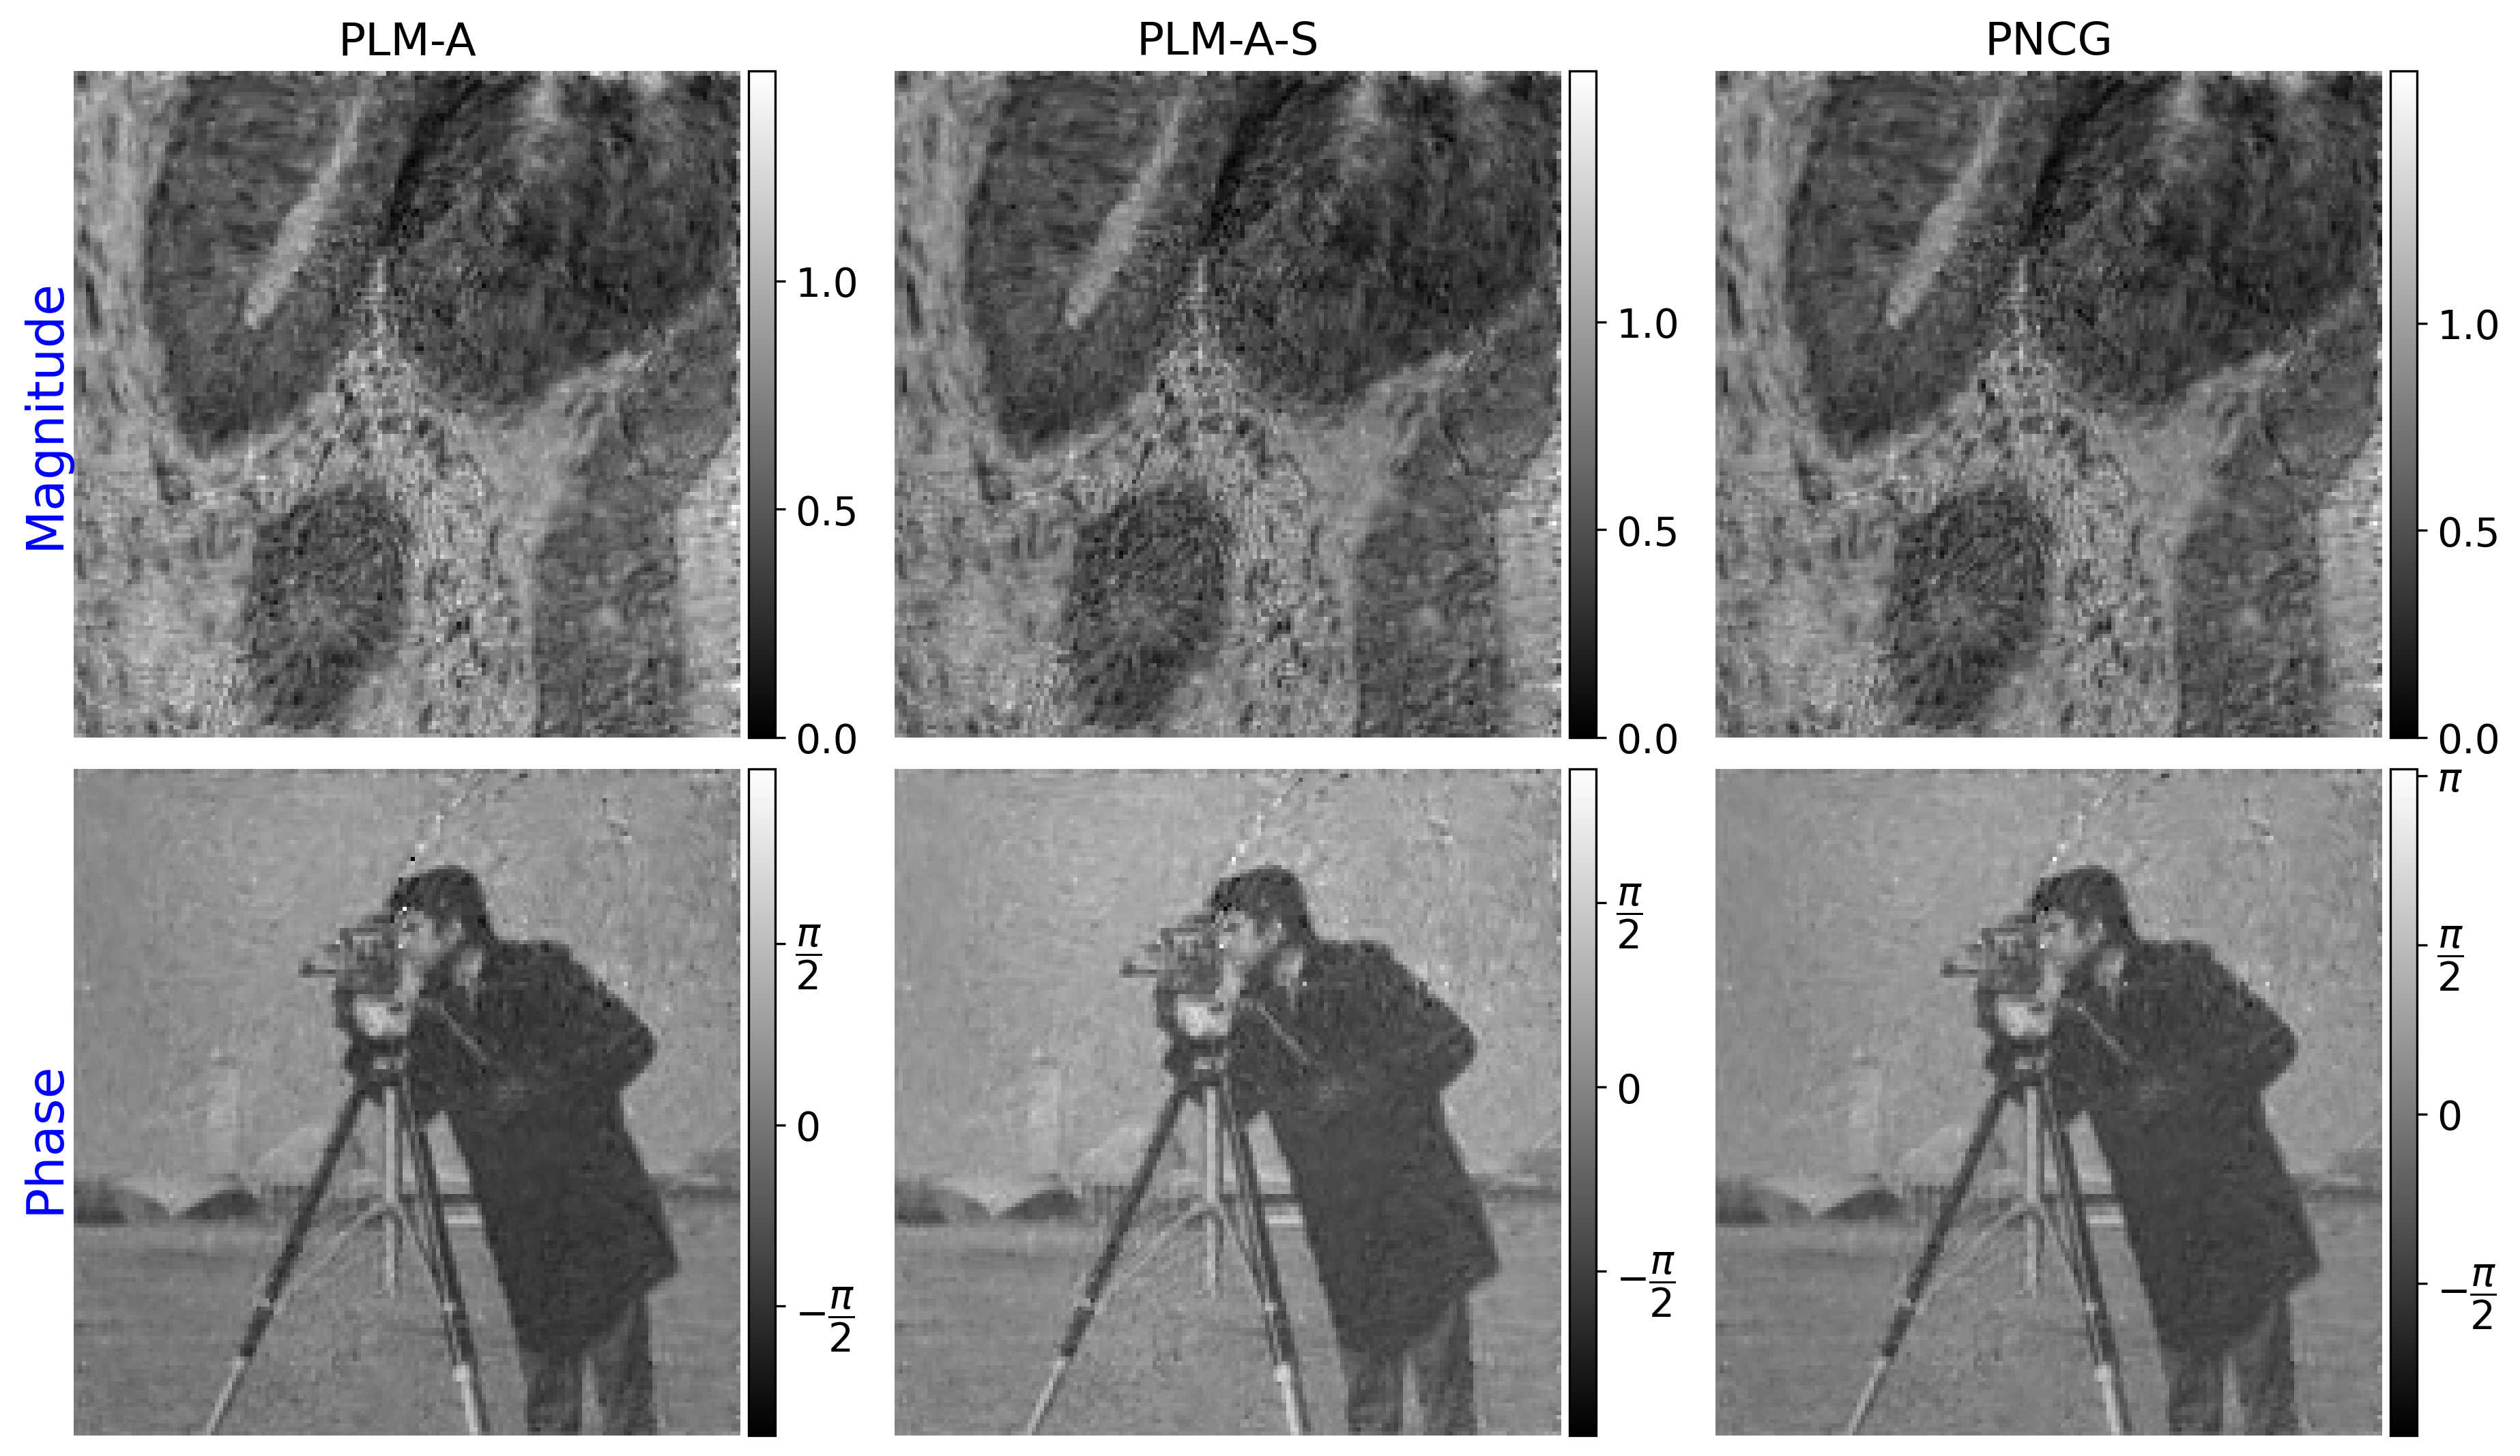

In [31]:
n_rows = 2
tot_row_width = row_width * n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=[tot_col_width,tot_row_width], constrained_layout=True, dpi=300)
col = 0
for ds in p_pa_datasets:
    method = ds.iterable_params['method']
    if method in ['LM-A', 'LM-A-S', 'NCG']: continue
    print(method)
    title = method
    if method == 'PLM-A': 
        title = 'PLM-A'
    obj_mean = np.mean(ds.final_objs, axis=0)
    _plotObjAmpl(np.abs(obj_mean), axes[0, col])
    angles = np.angle(obj_mean)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[1, col])
    
    axes[0, col].set_title(title, fontsize=16)
    col += 1
    
axes[0,0].text(-0.08, 0.3, 'Magnitude', transform=axes[0, 0].transAxes, 
               size=18, rotation=90, color='blue')
axes[1,0].text(-0.08, 0.35, 'Phase', transform=axes[1, 0].transAxes, 
               size=18, rotation=90, color='blue')
#plt.savefig('spr_1e3_poisson.pdf', bbox_inches='tight')

plt.savefig('spr_1e3_poisson.png', bbox_inches='tight')

## BPR data, poisson

In [33]:
df_keys_ordered = ['training_batch_size', 'method']
[
    p_pb_datasets,
    p_pb_dfs,
    p_pb_means,
    p_pb_lows, 
    p_pb_highs
] = anut.collectDatasetsAndDataframes(p_data_all_new, True,
                                      df_keys_ordered)
    

(0, 'PLM-A')
(0, 'LM-A')
(0, 'PLM-A-S')
(0, 'LM-A-S')
(0, 'PLM-J')
(0, 'PLM-J-S')
(0, 'ADMM')


In [36]:
!du -h bpr_1e3_poisson.*

3.4M	bpr_1e3_poisson.pdf
780K	bpr_1e3_poisson.png


PLM-A
1.0
0 1
PLM-A-S
1.0
0 2
PLM-J
1.0
1 0
PLM-J-S
1.0
1 1
ADMM
1.0
1 2


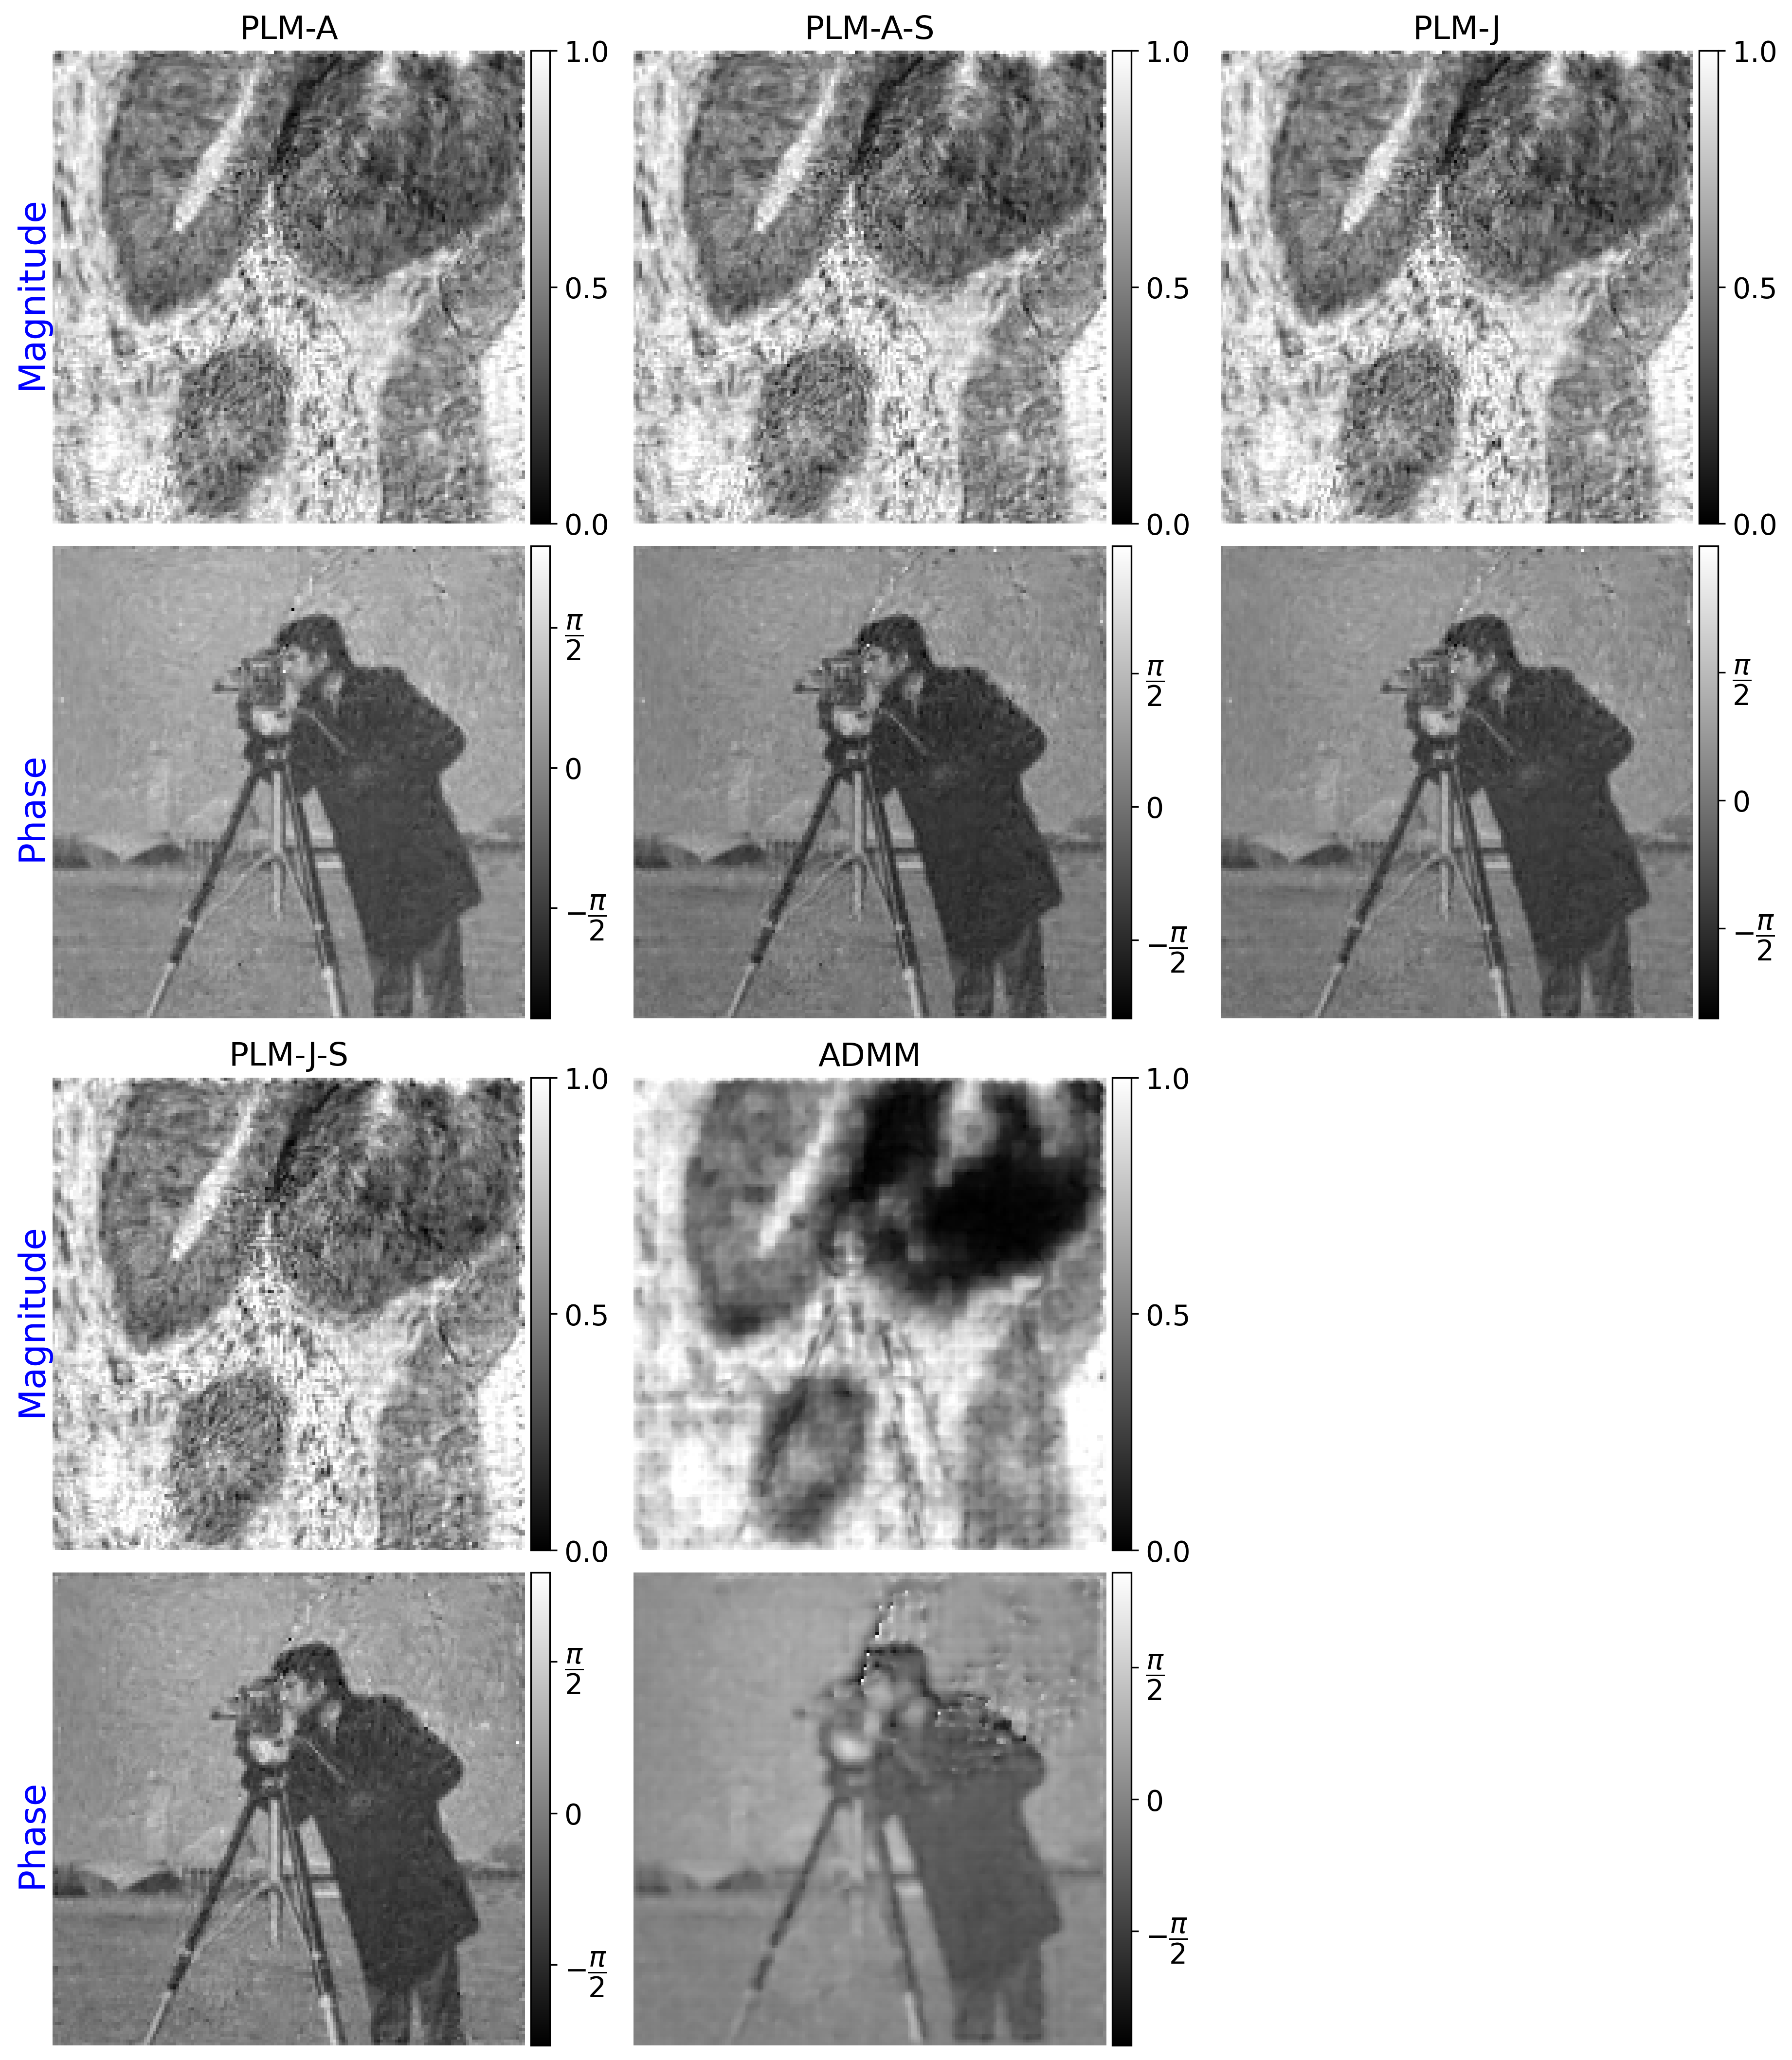

In [35]:
n_rows = 4
tot_row_width = row_width * n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=[tot_col_width,tot_row_width], constrained_layout=True, dpi=300)
col = 0
row = 0
count = 0
for ds in p_pb_datasets:
    method = ds.iterable_params['method']
    if method in ['LM-A', 'NCG', 'LM-A-S', 'PNCG']: continue
    print(method)
    title = method
    if method == 'PLM-A': 
        title = 'PLM-A'
    obj_mean = np.mean(ds.final_objs, axis=0)
    _plotObjAmpl(np.abs(obj_mean), axes[row * 2, col])
    angles = np.angle(obj_mean)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[2 * row + 1, col])
    
    axes[2 * row, col].set_title(title, fontsize=16)
    axes[2 * row, col].set_axis_off()
    count = count + 1
    col = count % n_cols
    row = count // n_cols
    print(row, col)
    
    
axes[2,2].set_axis_off()
axes[3,2].set_axis_off()
axes[0,0].text(-0.08, 0.3, 'Magnitude', transform=axes[0, 0].transAxes, 
               size=18, rotation=90, color='blue')
axes[1,0].text(-0.08, 0.35, 'Phase', transform=axes[1, 0].transAxes, 
               size=18, rotation=90, color='blue')

    
axes[2,0].text(-0.08, 0.3, 'Magnitude', transform=axes[2, 0].transAxes, 
               size=18, rotation=90, color='blue')
axes[3,0].text(-0.08, 0.35, 'Phase', transform=axes[3, 0].transAxes, 
               size=18, rotation=90, color='blue')
#plt.savefig('bpr_1e3_poisson.pdf', bbox_inches='tight')
plt.savefig('bpr_1e3_poisson.png', bbox_inches='tight')